In [1]:
pwd

'/fast/AG_Bunina/Yusuf/jobs'

In [2]:
cd '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al


In [3]:
import os
import scanpy as sc
import anndata as ad

In [5]:
import pickle
infile = open('Mallet_models_w_7269_cells_feeatures_filtered.pkl', 'rb')
models_w_filtered_features = pickle.load(infile)
infile.close()

In [6]:
import pickle
infile = open('cistopic_obj_filtered_features.pkl', 'rb')
cistopic_obj_filtered_features = pickle.load(infile)
infile.close()

In [8]:
import warnings
warnings.simplefilter(action='ignore')
import pycisTopic
pycisTopic.__version__

'1.0a0'

In [20]:
import pycisTopic

In [23]:
pycisTopic.lda_models.evaluate_models # I will use this function because only "evaluate models" could not be found. 

<function pycisTopic.lda_models.evaluate_models(models: List[ForwardRef('CistopicLDAModel')], select_model: Union[int, NoneType] = None, return_model: Union[bool, NoneType] = True, metrics: Union[str, NoneType] = ['Minmo_2011', 'loglikelihood', 'Cao_Juan_2009', 'Arun_2010'], min_topics_coh: Union[int, NoneType] = 5, plot: Union[bool, NoneType] = True, figsize: Union[Tuple[float, float], NoneType] = (6.4, 4.8), plot_metrics: Union[bool, NoneType] = False, save: Union[str, NoneType] = None)>

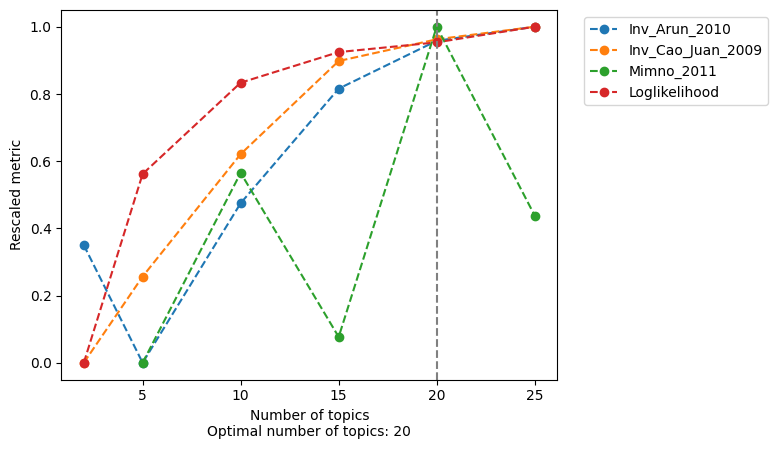

In [22]:
#os.mkdir('models')
model=pycisTopic.lda_models.evaluate_models(models_w_filtered_features,
                     select_model=None,
                     return_model=True,
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= "models/"+'models_w_filtered_features_selection.pdf')

In [25]:
model.cell_topic

,8_CTCTGTTCAATGCGCT-1___cisTopic,8_AATACCGGTGCTTTAC-1___cisTopic,8_CTAACCCTCGCAAACT-1___cisTopic,8_TTTGGTGCACCTCGCT-1___cisTopic,8_GGCTTCAAGAACCTGT-1___cisTopic,8_GATCGAGCAGTAGCCT-1___cisTopic,4_CCGCACACAGGAATCG-1___cisTopic,8_CTCATGCTCCTCATGC-1___cisTopic,4_GTAAGCGCATAATCGT-1___cisTopic,8_ACTTATGAGCACCACA-1___cisTopic,...,5936_ATAAGCCTCAACAAGG-1___cisTopic,4_CAAGGCCTCTCGACCT-1___cisTopic,150656_CGAAGAATCCTTAGGG-1___cisTopic,4422_TCTAGCCTCGGTAACT-1___cisTopic,150656_CAGCATTAGGTAAGGC-1___cisTopic,5936_CTACAACAGTAACAGG-1___cisTopic,5936_TCGGTTCTCATTTGCT-1___cisTopic,4422_GAACCGCTCATTGCGG-1___cisTopic,5936_TTGTGTGCACCCACCT-1___cisTopic,5936_TCAAGGAAGGAGGACT-1___cisTopic
Topic1,0.017367,0.012069,0.004106,0.038462,0.199270,0.012210,0.071504,0.029026,0.013751,0.066176,...,0.038978,0.006657,0.002120,0.009608,0.004394,0.019452,0.016894,0.020863,0.007091,0.008562
Topic2,0.005360,0.016951,0.006039,0.038462,0.024088,0.030064,0.018520,0.010300,0.008605,0.013655,...,0.060484,0.022984,0.011447,0.011914,0.002484,0.016117,0.025263,0.032854,0.018090,0.015411
Topic3,0.008362,0.005560,0.004589,0.028428,0.015328,0.017135,0.022180,0.032772,0.020848,0.017857,...,0.025538,0.014695,0.006925,0.046503,0.005159,0.016858,0.035493,0.032374,0.024457,0.011073
Topic4,0.015652,0.011527,0.017633,0.031773,0.063504,0.022471,0.065114,0.010300,0.027058,0.028361,...,0.052419,0.006405,0.001272,0.008071,0.002484,0.005372,0.030843,0.015108,0.003907,0.015868
Topic5,0.016081,0.010713,0.006522,0.021739,0.015328,0.005438,0.018706,0.014045,0.024752,0.019958,...,0.009409,0.046094,0.009751,0.006533,0.011272,0.006484,0.017824,0.023741,0.008828,0.013813
Topic6,0.064966,0.080146,0.110870,0.045151,0.097080,0.069259,0.058661,0.079588,0.135114,0.068277,...,0.079301,0.165662,0.047060,0.060338,0.057509,0.032049,0.014414,0.014628,0.074530,0.083447
Topic7,0.094125,0.053567,0.038889,0.075251,0.044526,0.080135,0.069208,0.042135,0.058463,0.009454,...,0.038978,0.132253,0.012012,0.013451,0.011272,0.043535,0.073931,0.023261,0.059479,0.030479
Topic8,0.389151,0.393138,0.269324,0.235786,0.210949,0.289247,0.271653,0.416667,0.286462,0.169118,...,0.030914,0.018965,0.002402,0.006533,0.002102,0.011671,0.011314,0.008873,0.001881,0.001941
Topic9,0.094554,0.110523,0.250966,0.112040,0.035766,0.149497,0.072993,0.044007,0.099982,0.127101,...,0.014785,0.006154,0.019644,0.019600,0.004012,0.005743,0.011934,0.013189,0.007091,0.004680
Topic10,0.022942,0.031598,0.034058,0.045151,0.060584,0.030064,0.106496,0.023408,0.111515,0.049370,...,0.065860,0.004145,0.021057,0.069562,0.030378,0.091330,0.085710,0.041487,0.030535,0.075228


In [26]:
# Add model to cisTopicObject
cistopic_obj_filtered_features.add_LDA_model(model)

In [27]:
model.n_topic

20

In [28]:
model.n_cells

7269

In [29]:
model.n_regions

60027

In [30]:
# Save
with open('cistopic_obj_filtered_features_w_model.pkl', 'wb') as f:
  pickle.dump(cistopic_obj_filtered_features, f)

In [31]:
# read the second object with more features but less number of topics:

In [32]:
import pickle
infile = open('Mallet_models_w_7269_cells.pkl', 'rb')
models_w_all_features = pickle.load(infile)
infile.close()

infile = open('cistopic_obj_7269_cells.pkl', 'rb')
cistopic_obj_ALL_features = pickle.load(infile)
infile.close()

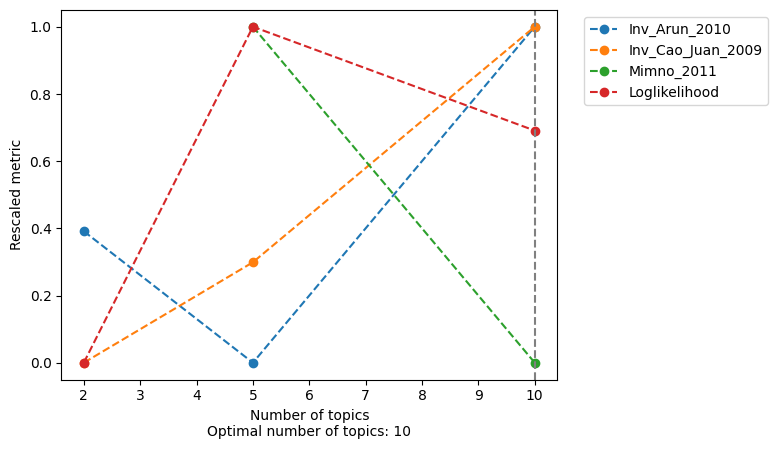

In [33]:
model_2=pycisTopic.lda_models.evaluate_models(models_w_all_features,
                     select_model=None,
                     return_model=True,
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= "models/"+'models_w_all_features_selection.pdf')

In [34]:
# Add model to cisTopicObject
cistopic_obj_ALL_features.add_LDA_model(model_2)

In [35]:
# Save
with open('cistopic_obj_ALL_features_w_model.pkl', 'wb') as f:
  pickle.dump(cistopic_obj_ALL_features, f)

In [4]:
import pickle
infile = open('cistopic_obj_filtered_features_w_model.pkl', 'rb')
cistopic_obj_filtered_features = pickle.load(infile)
infile.close()

In [36]:
# Clustering and visualization:

# We can cluster the cells (or regions) using the leiden algorithm, 
# and perform dimensionality reduction with UMAP and TSNE. 
# In these examples we will focus on the cells only. 
# For these steps, the cell-topic contriibutions of the model will be used.

In [5]:
from pycisTopic.clust_vis import *
find_clusters(cistopic_obj_filtered_features,
                 target  = 'cell',
                 k = 10,
                 res = [0.6],
                 prefix = 'pycisTopic_',
                 scale = True,
                 split_pattern = '-')

2024-03-13 23:12:55,202 cisTopic     INFO     Finding neighbours


In [6]:
run_umap(cistopic_obj_filtered_features,
                 target  = 'cell', scale=True)

2024-03-13 23:12:59,590 cisTopic     INFO     Running UMAP


/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [7]:
run_tsne(cistopic_obj_filtered_features,
                 target  = 'cell', scale=True)

2024-03-13 23:13:47,134 cisTopic     INFO     Running TSNE


In [42]:
os.mkdir('visualization')


In [8]:
cistopic_obj_filtered_features.cell_data.columns.tolist()

['cisTopic_nr_frag',
 'cisTopic_log_nr_frag',
 'cisTopic_nr_acc',
 'cisTopic_log_nr_acc',
 'sample_id',
 'author_cell_type',
 'age_group',
 'donor_id',
 'nCount_RNA',
 'nFeature_RNA',
 'nCount_ATAC',
 'nFeature_ATAC',
 'TSS_percentile',
 'nucleosome_signal',
 'percent_mt',
 'assay_ontology_term_id',
 'cell_type_ontology_term_id',
 'development_stage_ontology_term_id',
 'disease_ontology_term_id',
 'self_reported_ethnicity_ontology_term_id',
 'organism_ontology_term_id',
 'sex_ontology_term_id',
 'tissue_ontology_term_id',
 'suspension_type',
 'is_primary_data',
 'batch',
 'tissue_type',
 'cell_type',
 'assay',
 'disease',
 'organism',
 'sex',
 'tissue',
 'self_reported_ethnicity',
 'development_stage',
 'observation_joinid',
 'pycisTopic_leiden_10_0.6']

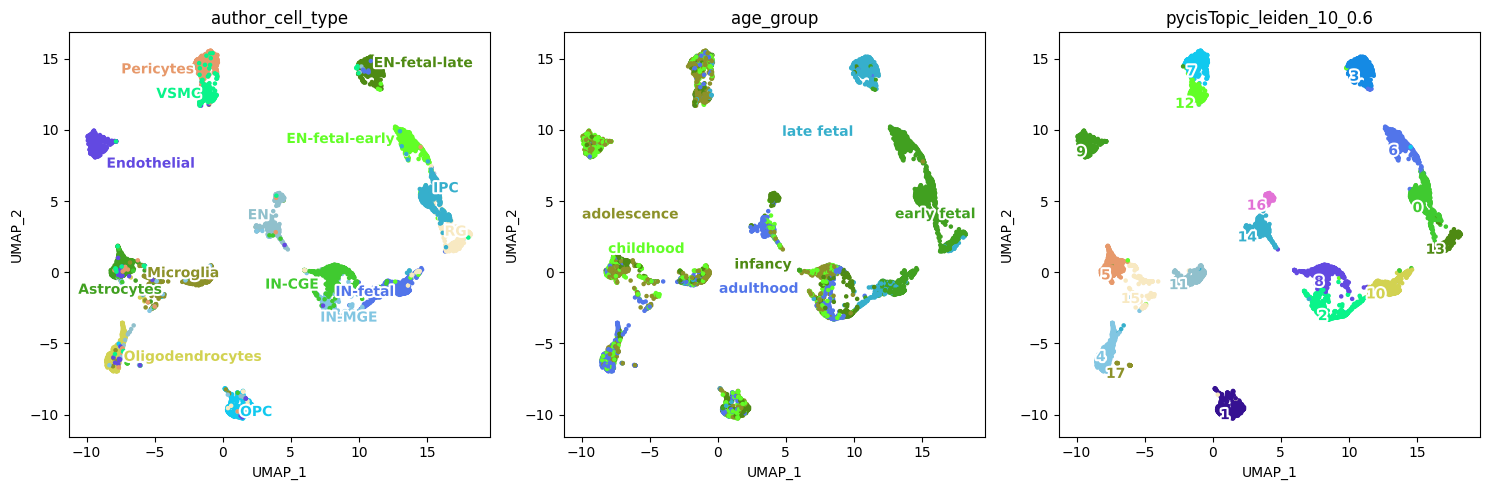

In [9]:
plot_metadata(cistopic_obj_filtered_features,
                 reduction_name='UMAP',
                 variables=['author_cell_type', 'age_group', 'pycisTopic_leiden_10_0.6'], # Labels from new clusters
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=5,
                 figsize=(15,5),
                 save= 'visualization/' + 'dimensionality_reduction_label.pdf')

In [10]:
# We can also plot the topic-contributions.

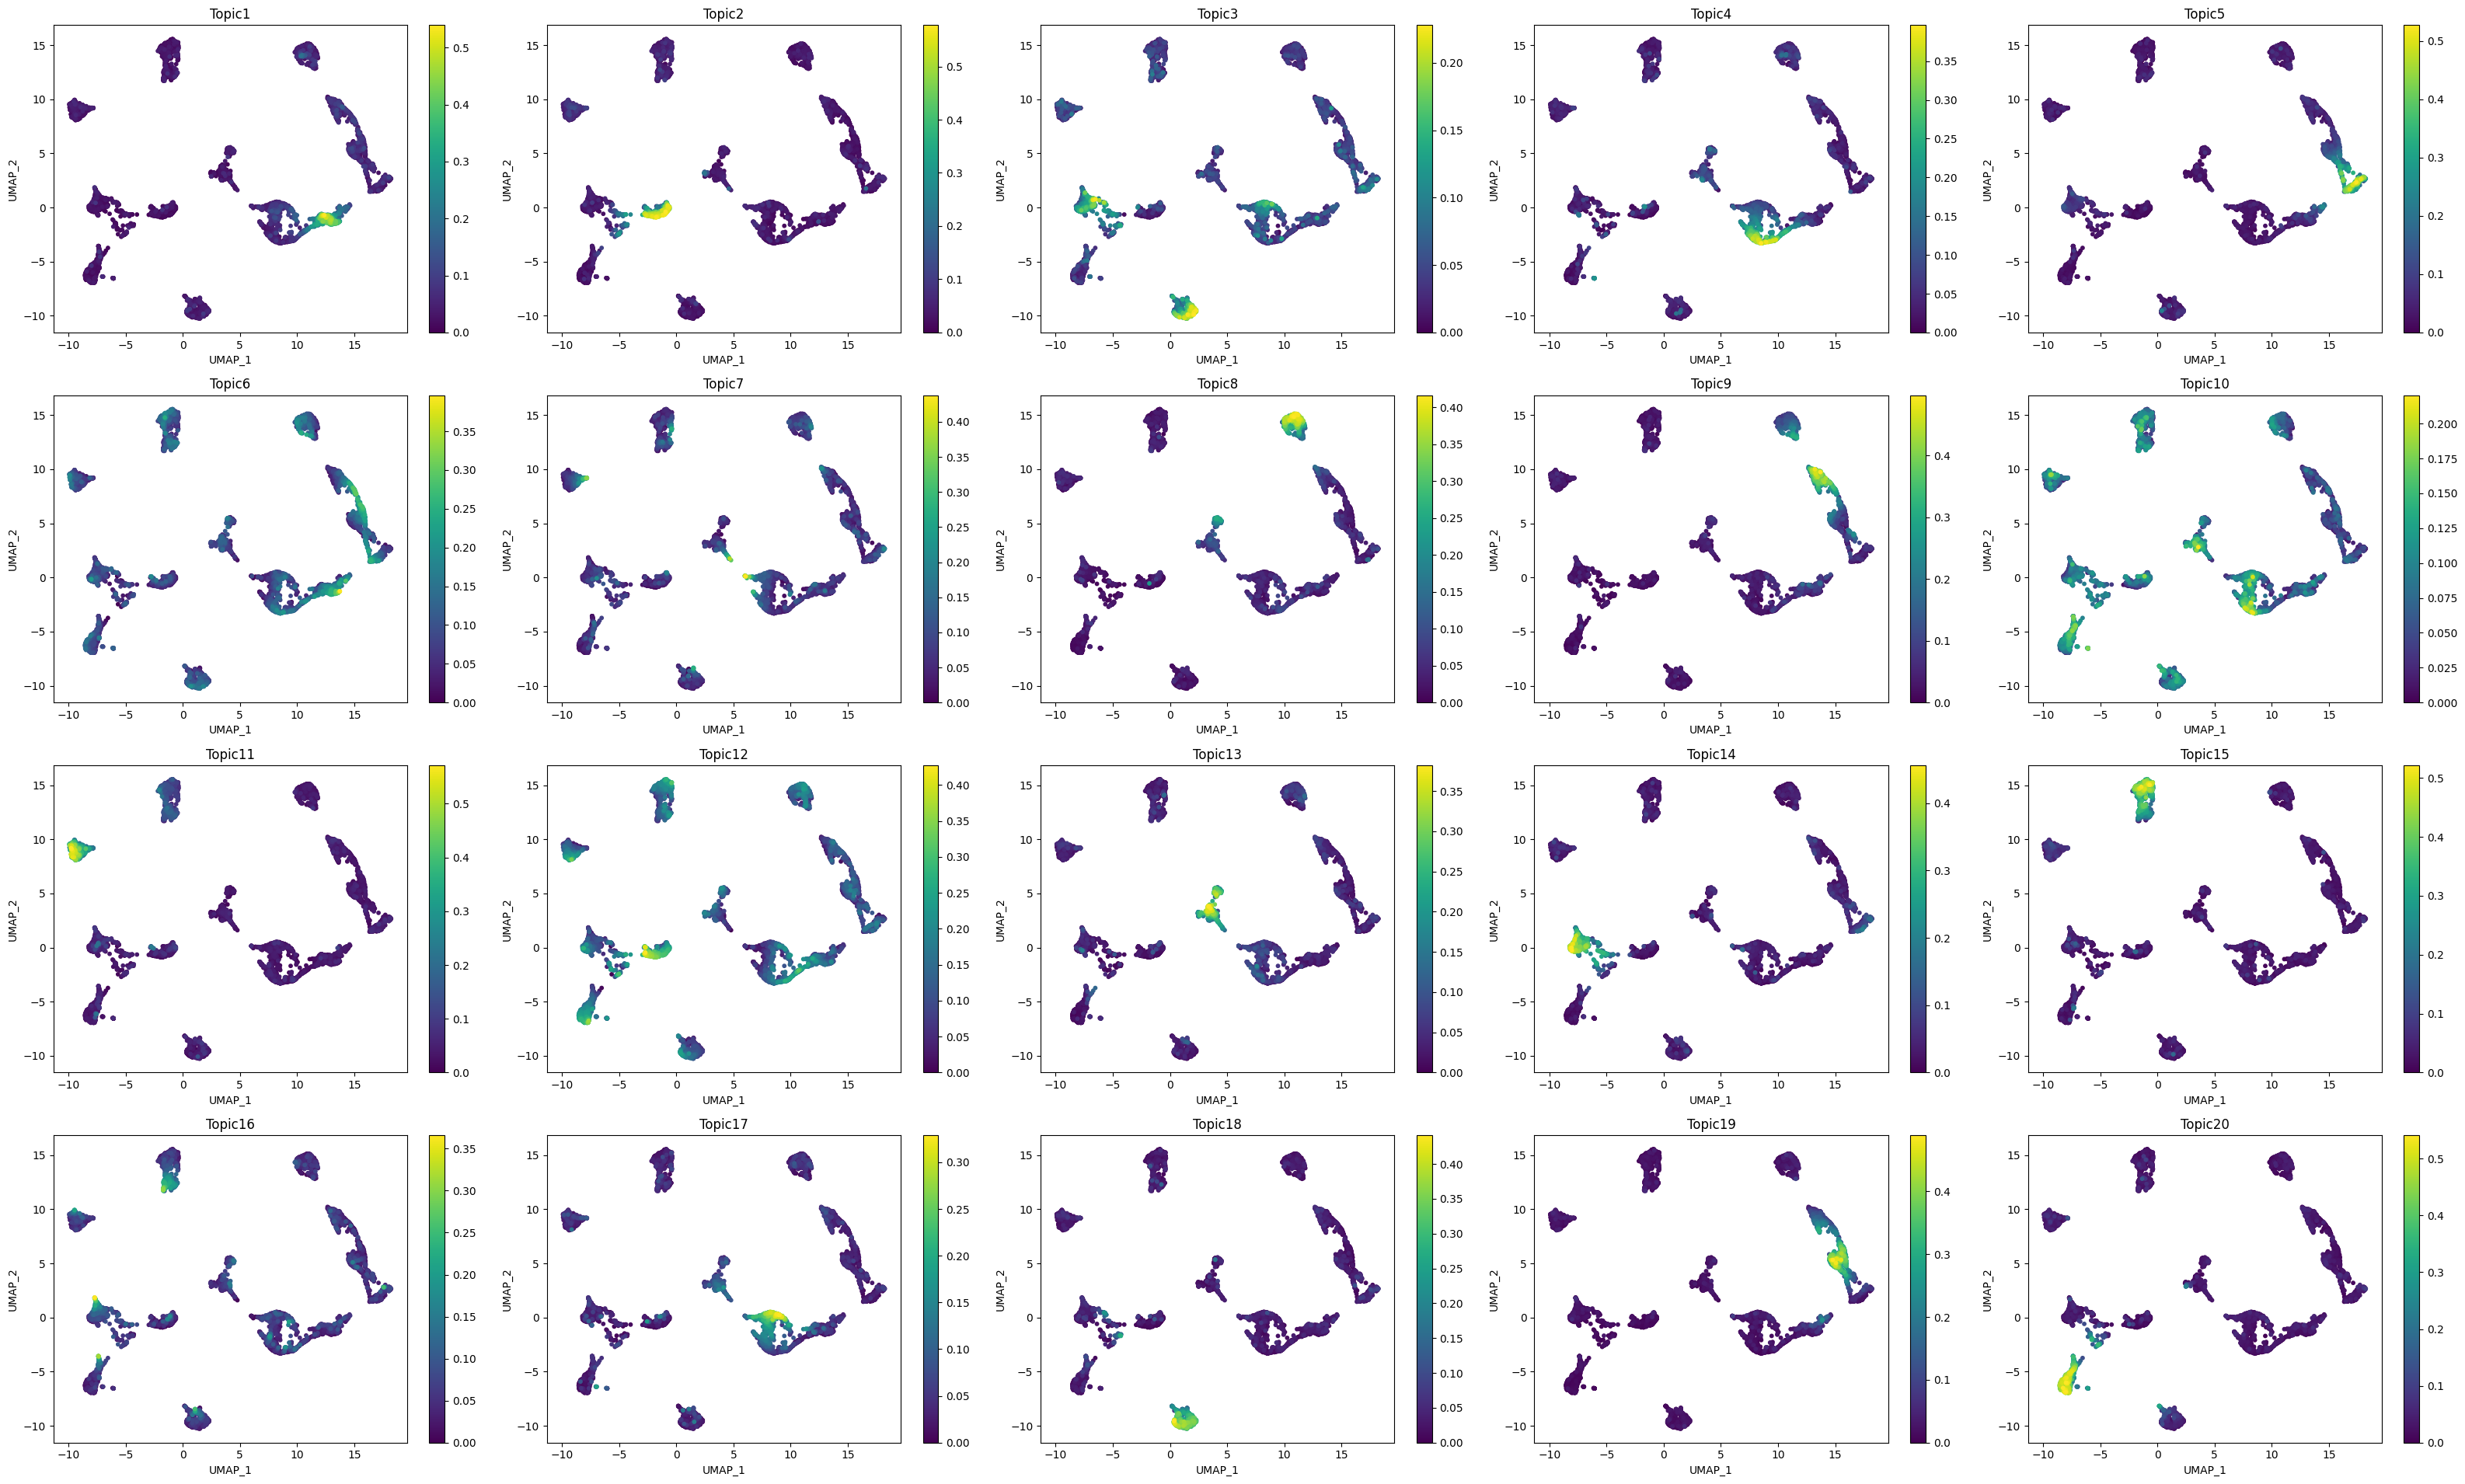

In [11]:
plot_topic(cistopic_obj_filtered_features,
            reduction_name = 'UMAP',
            target = 'cell',
            num_columns=5,
            save= 'visualization/dimensionality_reduction_topic_contr.pdf')

In [49]:
# Or we can also draw a heatmap with the topic contributions (and annotations).

In [51]:
# I will add the string version of cell types to use in the follwing function:

In [12]:
cistopic_obj_filtered_features.cell_data["author_cell_type_STRING"] = cistopic_obj_filtered_features.cell_data["author_cell_type"].astype(str)

In [13]:
cistopic_obj_filtered_features.cell_data["author_cell_type_STRING"]

8_CTCTGTTCAATGCGCT-1___cisTopic       EN-fetal-late
8_AATACCGGTGCTTTAC-1___cisTopic       EN-fetal-late
8_CTAACCCTCGCAAACT-1___cisTopic       EN-fetal-late
8_TTTGGTGCACCTCGCT-1___cisTopic       EN-fetal-late
8_GGCTTCAAGAACCTGT-1___cisTopic       EN-fetal-late
                                          ...      
5936_CTACAACAGTAACAGG-1___cisTopic             VSMC
5936_TCGGTTCTCATTTGCT-1___cisTopic             VSMC
4422_GAACCGCTCATTGCGG-1___cisTopic             VSMC
5936_TTGTGTGCACCCACCT-1___cisTopic             VSMC
5936_TCAAGGAAGGAGGACT-1___cisTopic             VSMC
Name: author_cell_type_STRING, Length: 7269, dtype: object

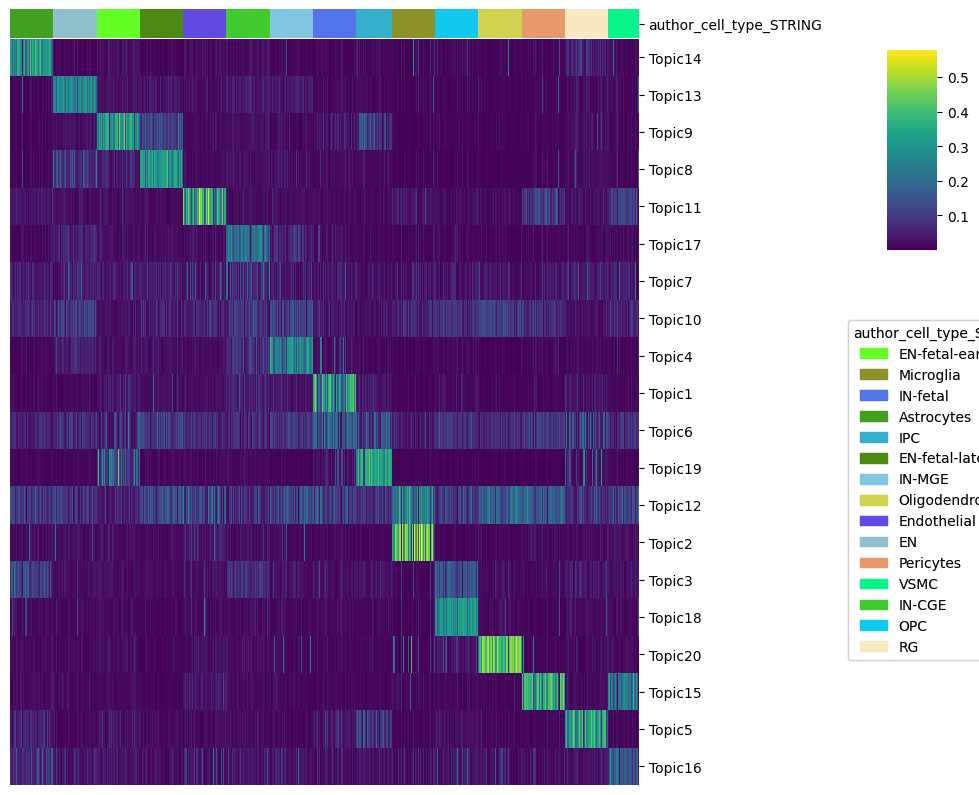

In [14]:
cell_topic_heatmap(cistopic_obj_filtered_features,
                     variables = ['author_cell_type_STRING'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = 'visualization/heatmap_topic_contr.pdf')

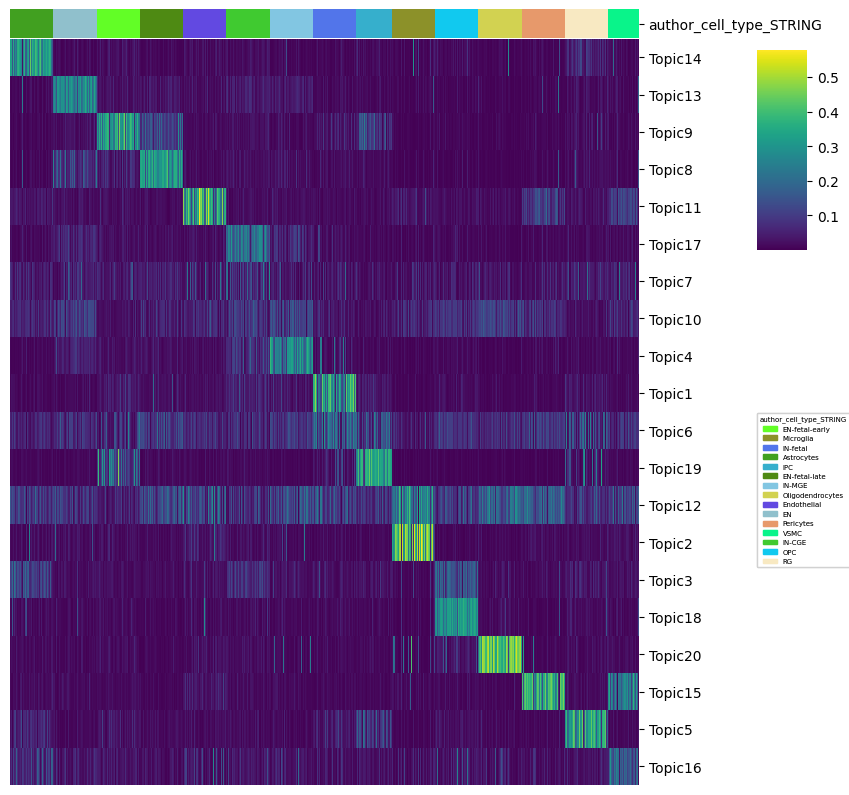

In [25]:
cell_topic_heatmap(cistopic_obj_filtered_features,
                     variables = ['author_cell_type_STRING'],
                     scale = False,
                     legend_loc_x = 0.92,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = 'visualization/heatmap_topic_contr_legend_customised.pdf')

In [26]:
cistopic_obj_filtered_features.cell_data["author_cell_type_STRING"].value_counts()

author_cell_type_STRING
EN-fetal-late       500
Astrocytes          500
Oligodendrocytes    500
OPC                 500
Microglia           500
EN                  500
IN-fetal            500
EN-fetal-early      500
IN-MGE              500
IN-CGE              500
RG                  500
Endothelial         500
Pericytes           500
IPC                 414
VSMC                355
Name: count, dtype: int64

In [27]:
cistopic_obj_filtered_features.cell_data["cell_type_STRING"] = cistopic_obj_filtered_features.cell_data["cell_type"].astype(str)

In [33]:
# Note_ When I run the follwing code for the first time, it assigns a color dictionary which can be accessed by hovering the cursor on the function name and pressing the shift + tab.

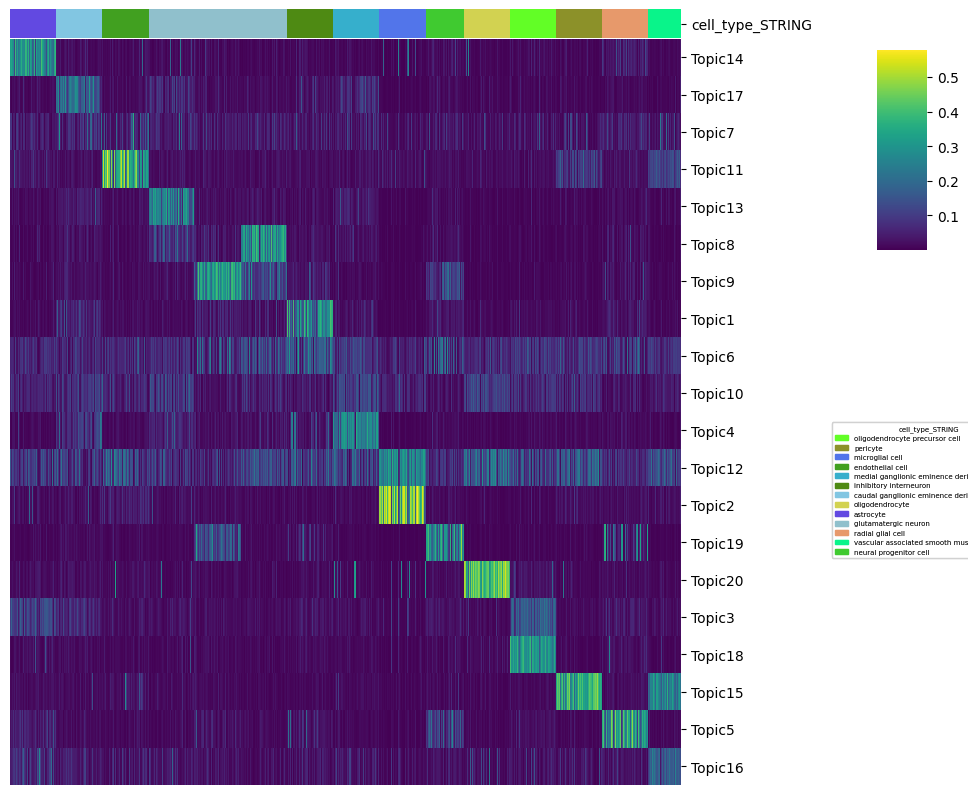

In [32]:
cell_topic_heatmap(cistopic_obj_filtered_features,
                     variables = ['cell_type_STRING'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     color_dict = {'cell_type_STRING': {'oligodendrocyte precursor cell': (0.3843137254901961, 0.996078431372549, 0.14901960784313725), 'pericyte': (0.5490196078431373, 0.5686274509803921, 0.1607843137254902), 'microglial cell': (0.3215686274509804, 0.4588235294117647, 0.9176470588235294), 'endothelial cell': (0.2549019607843137, 0.6274509803921569, 0.12549019607843137), 'medial ganglionic eminence derived interneuron': (0.21176470588235294, 0.6862745098039216, 0.8), 'inhibitory interneuron': (0.3058823529411765, 0.5411764705882353, 0.07450980392156863), 'caudal ganglionic eminence derived interneuron': (0.5098039215686274, 0.7764705882352941, 0.8862745098039215), 'oligodendrocyte': (0.8235294117647058, 0.8235294117647058, 0.3176470588235294), 'astrocyte': (0.3843137254901961, 0.28627450980392155, 0.8823529411764706), 'glutamatergic neuron': (0.5647058823529412, 0.7529411764705882, 0.8), 'radial glial cell': (0.9058823529411765, 0.6, 0.4196078431372549), 'vascular associated smooth muscle cell': (0.03529411764705882, 0.9568627450980393, 0.5411764705882353), 'neural progenitor cell': (0.25098039215686274, 0.792156862745098, 0.18823529411764706)}},
                     save = 'visualization/heatmap_topic_contr_w_cell_type.pdf')

In [34]:
cistopic_obj_filtered_features.cell_data["cell_type_STRING"].value_counts()

cell_type_STRING
glutamatergic neuron                              1500
astrocyte                                          500
oligodendrocyte                                    500
oligodendrocyte precursor cell                     500
microglial cell                                    500
inhibitory interneuron                             500
medial ganglionic eminence derived interneuron     500
caudal ganglionic eminence derived interneuron     500
radial glial cell                                  500
endothelial cell                                   500
pericyte                                           500
neural progenitor cell                             414
vascular associated smooth muscle cell             355
Name: count, dtype: int64

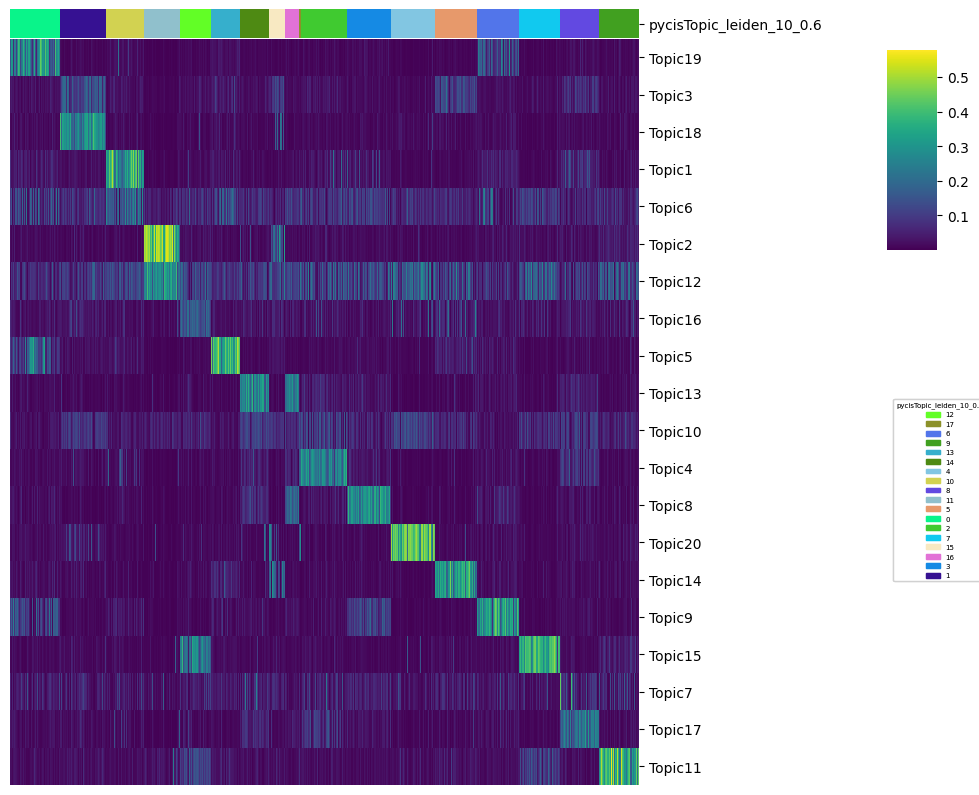

In [36]:
cell_topic_heatmap(cistopic_obj_filtered_features,
                     variables = ['pycisTopic_leiden_10_0.6'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     color_dict={'pycisTopic_leiden_10_0.6': {'0': (0.3843137254901961, 0.996078431372549, 0.14901960784313725), '1': (0.5490196078431373, 0.5686274509803921, 0.1607843137254902), '2': (0.3215686274509804, 0.4588235294117647, 0.9176470588235294), '3': (0.2549019607843137, 0.6274509803921569, 0.12549019607843137), '4': (0.21176470588235294, 0.6862745098039216, 0.8), '5': (0.3058823529411765, 0.5411764705882353, 0.07450980392156863), '6': (0.5098039215686274, 0.7764705882352941, 0.8862745098039215), '7': (0.8235294117647058, 0.8235294117647058, 0.3176470588235294), '8': (0.3843137254901961, 0.28627450980392155, 0.8823529411764706), '9': (0.5647058823529412, 0.7529411764705882, 0.8), '10': (0.9058823529411765, 0.6, 0.4196078431372549), '11': (0.03529411764705882, 0.9568627450980393, 0.5411764705882353), '12': (0.25098039215686274, 0.792156862745098, 0.18823529411764706), '13': (0.06666666666666667, 0.788235294117647, 0.9372549019607843), '14': (0.9725490196078431, 0.9137254901960784, 0.7607843137254902), '15': (0.3843137254901961, 0.996078431372549, 0.14901960784313725), '16': (0.5490196078431373, 0.5686274509803921, 0.1607843137254902), '17': (0.3215686274509804, 0.4588235294117647, 0.9176470588235294)}},
                     save = 'visualization/heatmap_topic_contr_leiden_10_0.6.pdf')

In [37]:
# Save object:

with open('cistopic_obj_filtered_features_w_topics_clusters.pkl', 'wb') as f:
  pickle.dump(cistopic_obj_filtered_features, f)

In [38]:
import session_info

In [39]:
session_info.show()